BIA660 Team 5 Mid Term Project Report Udemy 

In [3]:
# importing all the necessary libraries
import nltk
import re
import demoji
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import google.auth
import warnings

warnings.filterwarnings("ignore")


In [4]:
from langdetect import detect
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from googleapiclient.discovery import build 
from sklearn.feature_extraction.text import CountVectorizer
import requests
from bs4 import BeautifulSoup, NavigableString 
import pandas as pd
from pyudemy import Udemy
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


False

<h3>👉 Data Extraction </h3>
<ol>
<l1>Scraping Scripts</li>
</ol>

1. <b><u>Udemy Api :</u></b> Extracting the details of a Udemy Courses with the help of the google's Udemy data api

In [6]:
udemy = Udemy("cJALNHo2M7YpvbJZWpTU7EJNCuiFR3kNb1q6We17", "peYJf8jwuxpU4ZuPL5pR39mcC8KBOFvzEK9WoBhQTNZ6PKuA5jks3uODgA61neI6LRLH4hapuyitIhmiRgWee4UIMRebFBzVUbokUQoMfvsFlNYHox86e1IHFPigAAH1")

In [67]:
def getCourseIds(search_text):
    course_details_df = pd.DataFrame(columns=['id', 'title', 'price'])
    courses = udemy.courses(search = search_text)['results']
    
    for course in courses:
        course_details_df = course_details_df.append({'id': course['id'], 'title': course['title'], 'price': course['price']}, ignore_index=True)

    top_5_course_ids = list(course_details_df[:5]['id'])
    return top_5_course_ids

def getCourseMetadata(course_id, i):
    page = 1
    reviews = []
    while True:
        reviews_response = udemy.course_reviews(course_id, page=page)
        for review in reviews_response['results']:
            if(review['content']):
                reviews.append({'id': i+1, 'review_comment': review['content'], 'review_comment_created': review['created'], 
                             'sentiment_score': '', 'sentiment_category': ''})

        if len(reviews) >= 50 or not reviews_response['next']:
            break
        
        page += 1
    return reviews

def getCourseReviews(course_ids):
    course_reviews_df = pd.DataFrame(columns=['id', 'review_comment', 'review_comment_created', 'sentiment_score', 'sentiment_category'])   
    
    for i, course_id in enumerate(course_ids):
        data = getCourseMetadata(course_id, i)
        course_reviews_df = course_reviews_df.append(data, ignore_index=True)

    return course_reviews_df


★ We can dynamically provide different course names but as an example we choose 'machine learning' as the course name input

In [14]:
# In this notebook we have used 'machine learning' as our keyword
course_name  = input("Enter the course of your interest : ")

In [69]:
course_ids = getCourseIds(course_name)
course_reviews_df_1 = getCourseReviews(course_ids)

In [70]:
course_reviews_df_1

,id,review_comment,review_comment_created,sentiment_score,sentiment_category
0,1,Amazing!,2023-04-27T09:36:40-07:00,,
1,1,Loved it and extremely thanks and my whole hea...,2023-04-24T08:39:07-07:00,,
2,1,It was great!,2023-04-21T10:25:11-07:00,,
3,1,The introduction to the deep NN configurations...,2023-04-21T10:21:50-07:00,,
4,1,So far so good,2023-04-21T06:48:47-07:00,,
...,...,...,...,...,...
245,5,Best course on deep learning in Python so far....,2022-01-18T00:21:14-08:00,,
246,5,The introduction suggests to me that this is e...,2022-01-13T18:02:46-08:00,,
247,5,Course is not a learner friendly and not up to...,2022-01-11T05:04:49-08:00,,
248,5,The structure of the course was a little diffi...,2022-01-03T06:23:21-08:00,,


In [9]:
list_all_courses_reveiws = [res['reveiws'][0], res['reveiws'][1], res['reveiws'][2], res['reveiws'][3], res['reveiws'][4]]

. converting all the list into the dataframes

In [60]:
df_all_comments = pd.DataFrame(columns=['comment', 'videoId', 'date'])

df_all_comments['comment'] =  list_all_courses_reveiws[0]
df_all_comments['videoId'] = 1
df_all_comments['date'] = res['published'][0]

rows = []
for item in list_all_courses_reveiws[1]:
    rows.append({'videoId': 2, 'comment': item})
df_all_comments = df_all_comments.append(rows)

rows = []
for item in list_all_courses_reveiws[2]:
    rows.append({'videoId': 3, 'comment': item})
df_all_comments = df_all_comments.append(rows)

rows = []
for item in list_all_courses_reveiws[3]:
    rows.append({'videoId': 4, 'comment': item})
df_all_comments = df_all_comments.append(rows)

rows = []
for item in list_all_courses_reveiws[4]:
    rows.append({'videoId': 5, 'comment': item})
df_all_comments = df_all_comments.append(rows)

ValueError: Length of values (600) does not match length of index (45)

Making a list containing all the data frames so our operations can be applied in a more easy and dynamic way

In [24]:
df_all_comments

,comment,videoId
0,the slides of course could have more graph / i...,1
1,Thanks Jose for such a Detailed Course on Pysp...,1
2,Super cource,1
3,Outdated! \nTime wasting,1
4,"Yes, great course till now",1
...,...,...
60,Very Good Explanation,5
61,well constructed course and good explanation e...,5
62,more interested to learn,5
63,very informative sessions with practical hands...,5


<h3>👉 Exploratory data analysis and description </h3>

1. Data Cleaning

In [71]:
# defining the function for data cleaning

def cleaning_df(x):
    x = demoji.replace(x,'')
    x = re.sub(r'[^a-zA-Z0-9\s]', '', x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"\n", "", x)
    return x

In [72]:
# applying the same function on all the data frames
course_reviews_df_1['review_comment'] = course_reviews_df_1['review_comment'].apply(cleaning_df)

In [73]:
course_reviews_df_1

,id,review_comment,review_comment_created,sentiment_score,sentiment_category
0,1,Amazing,2023-04-27T09:36:40-07:00,,
1,1,Loved it and extremely thanks and my whole hea...,2023-04-24T08:39:07-07:00,,
2,1,It was great,2023-04-21T10:25:11-07:00,,
3,1,The introduction to the deep NN configurations...,2023-04-21T10:21:50-07:00,,
4,1,So far so good,2023-04-21T06:48:47-07:00,,
...,...,...,...,...,...
245,5,Best course on deep learning in Python so far ...,2022-01-18T00:21:14-08:00,,
246,5,The introduction suggests to me that this is e...,2022-01-13T18:02:46-08:00,,
247,5,Course is not a learner friendly and not up to...,2022-01-11T05:04:49-08:00,,
248,5,The structure of the course was a little diffi...,2022-01-03T06:23:21-08:00,,


2. Data Visualisation 


★ Based on the comments created a network for all the videos data frames

In [28]:
def build_semantic_network(x):

    vectorizer = CountVectorizer(ngram_range=(1,1), min_df=2,stop_words="english", max_features=50) # default unigram model
    X = vectorizer.fit_transform(x)
    X
    feature_names = vectorizer.get_feature_names_out()
    co_mat = (X.T * X) 
    co_mat.setdiag(0) 
    co_matrix = np.where(co_mat.todense() > 0, 1, 0)
    
    G = nx.from_numpy_array(co_matrix, create_using=nx.Graph()) 
    node_name = dict(zip(range(0,len(list(G.nodes()))),feature_names))  
    G = nx.relabel_nodes(G, node_name) 

    plt.figure(figsize=(7, 7))

    node_size= [x*1000 for x in nx.eigenvector_centrality_numpy(G).values()]
    pos=nx.spring_layout(G)
    edge_color='grey'

    nx.drawing.nx_pylab.draw_networkx(G,node_size=node_size, pos=pos, edge_color=edge_color, with_labels=True, font_size=12)
    plt.title('The semantic network of the Searched Course')
    plt.axis("off") 
    plt.show()

    return G

In [42]:
reviews_1_set = set(course_reviews_df_1.loc[course_reviews_df_1['id'] == 1151632]['review_comment'])

Graph for df 


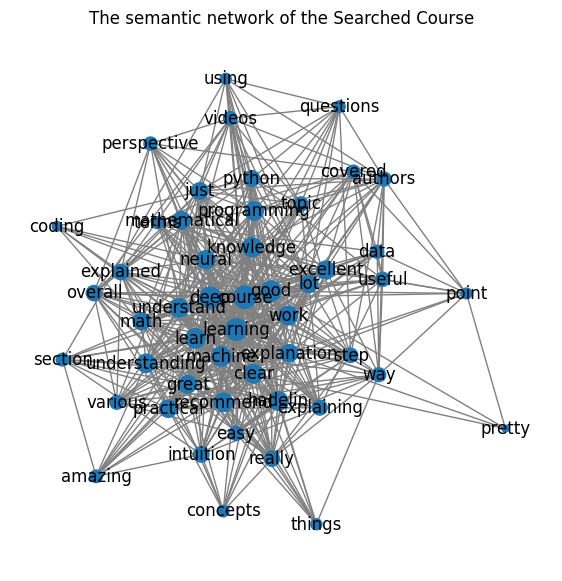

In [43]:
print('Graph for df ')
build_semantic_network(reviews_1_set)

★ As a result we can see all the networks are primarily focused onto the <b><u> 'python' </u></b> node which is quite obvious as our search query was 'python'

3. Tokenization followed by the Counter to get observe the word frequency 

In [14]:
def word_frequency_calculator(df):
    words = []

    for row in df[0]:
        sentence_tokens = nltk.word_tokenize(row)
        words.extend(sentence_tokens)

    filtered_tokens = [word.strip().lower() for word in words if word.lower() not in set(stopwords.words('english'))]

    return Counter(filtered_tokens)

In [15]:
word_count_list = []
for i in df_all_comments:
    word_count_list.append(word_frequency_calculator(i))

4. Visualisation of the most frequent words in each video comments

In [16]:
def plot_word_dist(x, y, i):
    plt.figure(figsize=(15,6))
    plt.bar(y, x, color=['black', 'red', 'cyan', 'green', 'blue'])
    plt.title("Most Frequent Words in video "+str(i+1))
   
    plt.xlabel("Most Frequent Words")
    plt.ylabel("Counts")

    plt.show()

In [36]:
# print("Most Common Word : ", word_count_list[0].most_common(10))
# for i in range(5):
#     x = []
#     y = []
#     for j in word_count_list[i].most_common(10):
#         x.append(j[1])
#         y.append(j[0])
#     plot_word_dist(x, y, i)

★ Our search was 'machine learning' and corresponding to that we have the most common word as 'ml, learning, supervised, etc'

5. Visualisation of the distribution of the ratings for each of the courses 

In [69]:
all_ratings = [res['ratings'][0], res['ratings'][1], res['ratings'][2], res['ratings'][3], res['ratings'][4]]

In [37]:
# print('Ratings distribution for course 1')
# plt.violinplot(all_ratings[0])

In [38]:
# print('Ratings distribution for course 2')
# plt.violinplot(all_ratings[1])

In [39]:
# print('Ratings distribution for course 3')
# plt.violinplot(all_ratings[2])

In [40]:
# print('Ratings distribution for course 4')
# plt.violinplot(all_ratings[3])

In [41]:
# print('Ratings distribution for course 5')
# plt.violinplot(all_ratings[4])

7. Performance Analysis using Sentiment Analysis

a. calculating the sentiments score as per the each comments in each video

In [128]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(x):
    sentiment = analyzer.polarity_scores(x)
    return sentiment['compound']

def get_score_cat(x):
    if x == 0:
        return 0
    if x > 0:
        return 1
    else:
        return -1 

course_reviews_df_1['sentiment_score'] = course_reviews_df_1['review_comment'].apply(get_sentiment_scores)
course_reviews_df_1['sentiment_category'] = course_reviews_df_1['sentiment_score'].apply(get_score_cat)
course_reviews_df_1

,id,review_comment,review_comment_created,sentiment_score,sentiment_category,topic_sentiment,course_content,instructor_quality,course_delivery,assignments_quizzes,course_community,course_certification
0,1,Amazing,2023-04-27T09:36:40-07:00,0.5859,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
1,1,Loved it and extremely thanks and my whole hea...,2023-04-24T08:39:07-07:00,0.9769,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
2,1,It was great,2023-04-21T10:25:11-07:00,0.6249,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
3,1,The introduction to the deep NN configurations...,2023-04-21T10:21:50-07:00,0.0000,0,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
4,1,So far so good,2023-04-21T06:48:47-07:00,0.6213,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
245,5,Best course on deep learning in Python so far ...,2022-01-18T00:21:14-08:00,0.4976,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
246,5,The introduction suggests to me that this is e...,2022-01-13T18:02:46-08:00,0.5106,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,False,False,False
247,5,Course is not a learner friendly and not up to...,2022-01-11T05:04:49-08:00,-0.6619,-1,"{'course_content': 1, 'instructor_quality': 0,...",True,False,False,True,True,False
248,5,The structure of the course was a little diffi...,2022-01-03T06:23:21-08:00,0.5083,1,"{'course_content': 0, 'instructor_quality': 0,...",False,False,False,True,False,False


In [75]:
course_content_words = {'comprehensive', 'engaging', 'up-to-date', 'easy to follow', 'useful', 'applicable', 'relevant', 'in-depth', 'detailed', 'clear'}
instructor_quality_words = {'knowledgeable', 'supportive', 'responsive', 'approachable', 'engaging', 'professional', 'clear communicator', 'experienced', 'skilled', 'helpful'}
course_delivery_words = {'easy to navigate', 'user-friendly', 'reliable', 'accessible', 'well-organized', 'clear audio and video', 'good pacing', 'smooth transitions', 'high-quality production', 'engaging'}
assignments_quizzes_words = {'relevant', 'challenging', 'informative', 'helpful', 'interesting', 'useful feedback', 'well-structured', 'thought-provoking', 'rigorous', 'educational'}
course_community_words = {'supportive', 'active', 'engaged', 'helpful', 'collaborative', 'interactive', 'responsive', 'welcoming', 'friendly', 'diverse'}
course_certification_words = {'recognized', 'credible', 'valuable', 'useful', 'industry-standard', 'comprehensive', 'rigorous', 'well-respected', 'marketable', 'accredited'}

def classify_review(review):
    feature_counts = {'course_content': 0, 'instructor_quality': 0, 'course_delivery': 0, 'assignments_quizzes': 0, 'course_community': 0, 'course_certification': 0}
    words = review.split()
    for word in words:
        if word.lower() in course_content_words:
            feature_counts['course_content'] += 1
        if word.lower() in instructor_quality_words:
            feature_counts['instructor_quality'] += 1
        if word.lower() in course_delivery_words:
            feature_counts['course_delivery'] += 1
        if word.lower() in assignments_quizzes_words:
            feature_counts['assignments_quizzes'] += 1
        if word.lower() in course_community_words:
            feature_counts['course_community'] += 1
        if word.lower() in course_certification_words:
            feature_counts['course_certification'] += 1
    return feature_counts

In [127]:
course_reviews_df_1['topic_sentiment'] = course_reviews_df_1['review_comment'].apply(classify_review)
course_reviews_df_1['course_content'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['course_content'] == 1)
course_reviews_df_1['instructor_quality'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['instructor_quality'] == 1)
course_reviews_df_1['course_delivery'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['course_delivery'] == 1)
course_reviews_df_1['assignments_quizzes'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['assignments_quizzes'] == 1)
course_reviews_df_1['course_community'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['course_community'] == 1)
course_reviews_df_1['course_certification'] = course_reviews_df_1['topic_sentiment'].apply(lambda x: x['course_certification'] == 1)

intent_count_by_course_df = course_reviews_df_1.groupby(['id','sentiment_category'])['course_content', 'instructor_quality', 'course_delivery', 'assignments_quizzes', 
                                                              'course_community', 'course_certification'].sum()

intent_count_by_course_df_pivoted = intent_count_by_course_df.reset_index().pivot(index='id', values=['course_content', 'instructor_quality', 'course_delivery', 'assignments_quizzes', 
                                                              'course_community', 'course_certification'], columns='sentiment_category')

intent_count_by_course_df_pivoted.fillna(0.0, inplace=True)
y = intent_count_by_course_df_pivoted['course_content']

intent_count_by_course_df_pivoted

course_content           instructor_quality            \
sentiment_category             -1    0    1                 -1    0    1   
id                                                                         
1                             1.0  0.0  6.0                0.0  0.0  1.0   
2                             0.0  0.0  3.0                0.0  0.0  1.0   
3                             2.0  0.0  3.0                0.0  0.0  2.0   
4                             0.0  0.0  9.0                0.0  1.0  2.0   
5                             1.0  0.0  3.0                0.0  0.0  3.0   

                   course_delivery           assignments_quizzes            \
sentiment_category              -1    0    1                  -1    0    1   
id                                                                           
1                              0.0  0.0  0.0                 0.0  0.0  3.0   
2                              0.0  0.0  0.0                 0.0  0.0  1.0   
3                              0.0  0.0  0.0                 0.0  0.0  2.0   
4                              0.0  0.0  1.0                 0.0  1.0  1.0   
5                              0.0  0.0  1.0                 1.0  0.0  4.0   

                   course_community           course_certification            
sentiment_category               -1    0    1                   -1    0    1  
id                                                                            
1                               0.0  0.0  1.0                  0.0  0.0  2.0  
2                               0.0  0.0  2.0                  0.0  0.0  1.0  
3                               0.0  0.0  3.0                  0.0  0.0  2.0  
4                               0.0  0.0  1.0                  0.0  0.0  3.0  
5                               1.0  0.0  1.0                  0.0  0.0  1.0

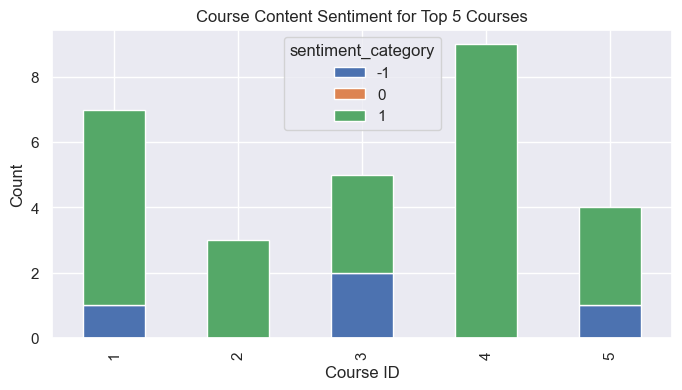

In [119]:
y.plot(kind='bar', stacked=True, figsize=(8,4))
plt.xlabel('Course ID')
plt.ylabel('Count')
plt.title('Course Content Sentiment for Top 5 Courses')
plt.show()

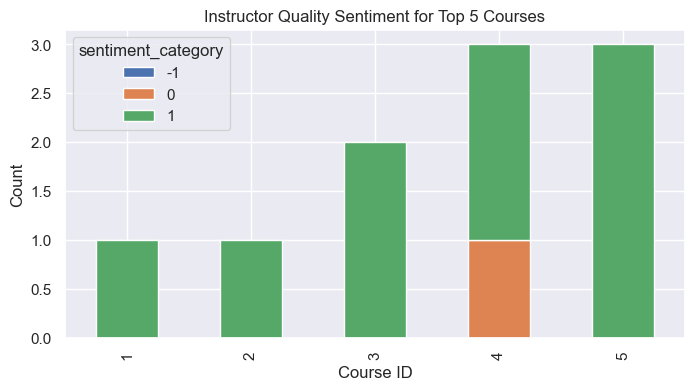

In [125]:
z = intent_count_by_course_df_pivoted['instructor_quality']
z.fillna(0.0, inplace=True)
z

z.plot(kind='bar', stacked=True, figsize=(8,4))
plt.xlabel('Course ID')
plt.ylabel('Count')
plt.title('Instructor Quality Sentiment for Top 5 Courses')
plt.show()

c. visualisation of comments based on the number of positive, neutral and negative values

Video 1 sentimental category plos


<AxesSubplot: xlabel='score_cat', ylabel='count'>

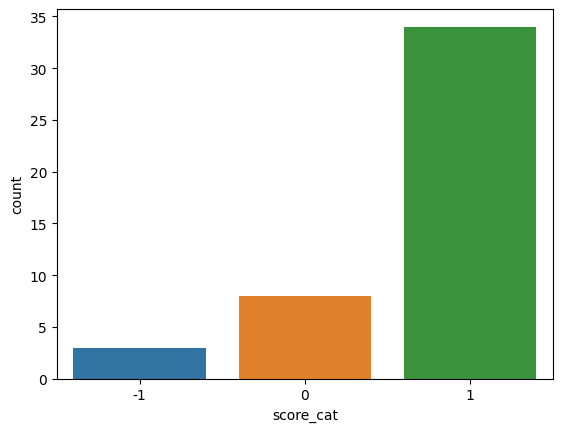

In [21]:
print("Video 1 sentimental category plos")
sns.countplot(x=df_all_comments[0]['score_cat'])

Video 2 sentimental category plos


<AxesSubplot: xlabel='score_cat', ylabel='count'>

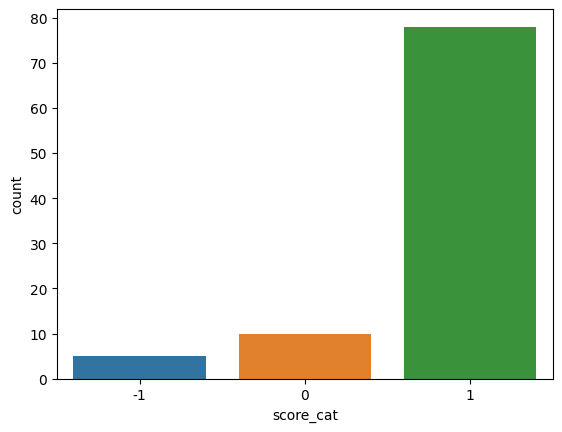

In [100]:
print("Video 2 sentimental category plos")
sns.countplot(x=df_all_comments[1]['score_cat'])

Video 3 sentimental category plos


<AxesSubplot: xlabel='score_cat', ylabel='count'>

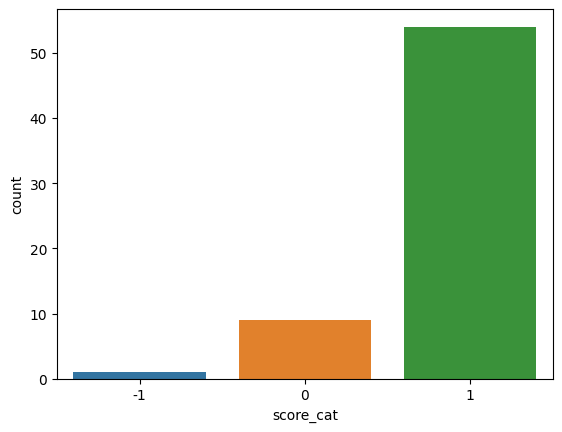

In [101]:
print("Video 3 sentimental category plos")
sns.countplot(x=df_all_comments[2]['score_cat'])

Video 4 sentimental category plos


<AxesSubplot: xlabel='score_cat', ylabel='count'>

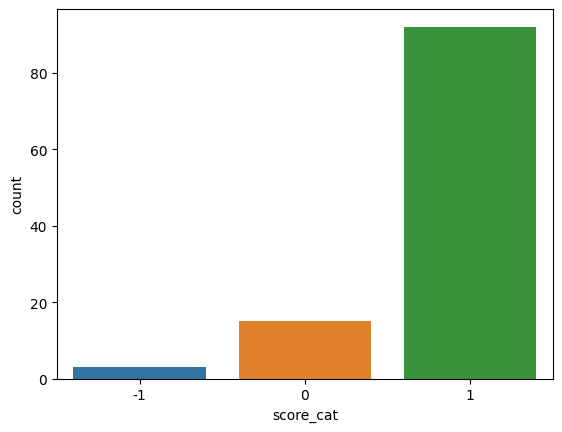

In [102]:
print("Video 4 sentimental category plos")
sns.countplot(x=df_all_comments[3]['score_cat'])

Video 5 sentimental category plos


<AxesSubplot: xlabel='score_cat', ylabel='count'>

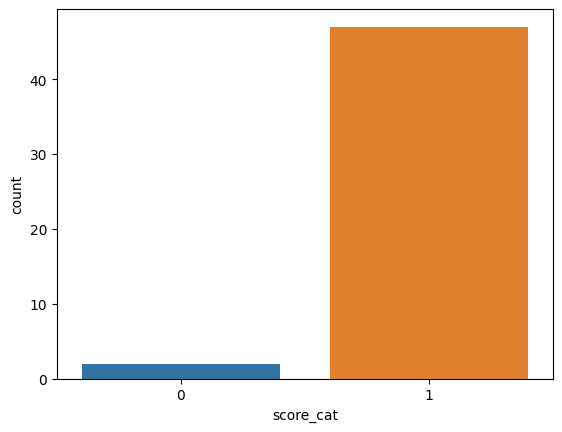

In [103]:
print("Video 5 sentimental category plos")
sns.countplot(x=df_all_comments[4]['score_cat'])

In [106]:
for i, j in enumerate(df_all_comments):
    print("Average Sentimental Score for video ", res['titles'][i])
    print(j['score'].mean())

Average Sentimental Score for video  100 Days of Code: The Complete Python Pro Bootcamp for 2023
0.5261428571428571
Average Sentimental Score for video  The Python Mega Course: Learn Python in 50 Days with 20 Apps
0.5339193548387097
Average Sentimental Score for video  Learn Python Programming Masterclass
0.46368437500000004
Average Sentimental Score for video  Complete Python Developer in 2023: Zero to Mastery
0.5011718181818181
Average Sentimental Score for video  The Complete Python Bootcamp From Zero to Hero in Python
0.5798224489795919


★ For each title is the corresponding average sentiment score

😀 Thank you !